# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [4]:
df = pd.read_csv("./data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
df.head(5)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [8]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [11]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

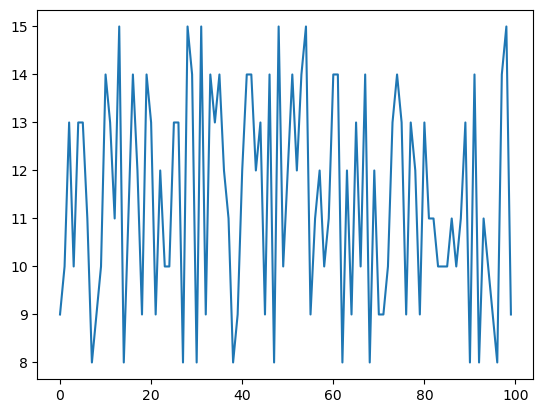

In [12]:
df.國文.plot()
plt.show()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

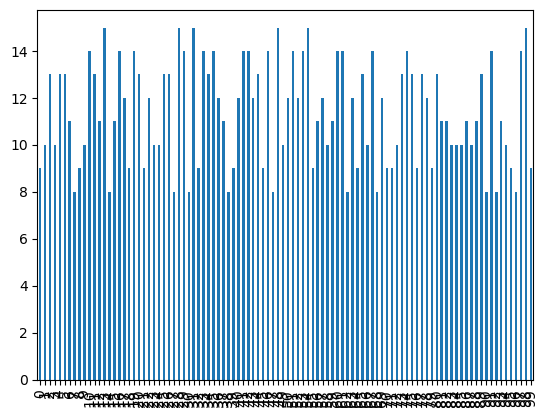

In [13]:
df.國文.plot(kind="bar")
plt.show()

## 3 一些基本的資料分析

算平均。

In [14]:
df.國文.mean()

11.39

算標準差。

In [15]:
df.國文.std()

2.196852661459484

不如就該算的都幫我們算算...

In [16]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [27]:
tmp = df.drop(['姓名'], axis=1)
tmp.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [28]:
tmp[["國文","英文"]].corr()

,國文,英文
國文,1.000000,0.160158
英文,0.160158,1.000000


## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [49]:
subjects = ["國文", "英文", "數學", "自然", "社會"]
df["總級分"] = df[list(subjects)].sum(axis=1)
df

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55
96,吳筱婷,8,10,14,10,15,57
97,陳家銘,14,9,11,8,12,54
98,李明威,15,9,8,9,15,56


### 【技巧】

有計算的當然也可以的。

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [50]:
df.sort_values("總級分", ascending=False)

,姓名,國文,英文,數學,自然,社會,總級分
80,施雅鈴,13,15,12,13,13,66
12,李正偉,11,15,11,14,15,66
54,陳怡潔,15,15,9,15,11,65
25,蔡亦瑄,13,13,14,13,12,65
57,胡淳茜,12,15,14,13,11,65
...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,47
32,林建亨,9,11,8,8,11,47
1,胡玉華,10,10,10,8,9,47
7,林金鳳,8,9,10,10,8,45


### 【重點】排序的方法

加權分最高, 同分才看總級分

### 【重點】重設 index

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [36]:
filt = (df["數學"]==15)
df.loc[filt]

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
24,陳竹伯,10,12,15,10,14,61
36,詹威德,12,13,15,10,14,64
37,曾怡君,11,12,15,13,14,65
39,段冠廷,9,8,15,12,15,59
59,芮秋辛,11,10,15,10,8,54
67,林哲法,14,9,15,10,14,62
70,葉儀依,9,13,15,8,14,59
73,吳志遠,13,15,15,8,8,59
76,周育霖,9,12,15,13,12,61


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [38]:
filt1 = (df["數學"]==15)
filt2 = (df["英文"]==15)
df.loc[filt1 & filt2]

,姓名,國文,英文,數學,自然,社會,總級分
73,吳志遠,13,15,15,8,8,59


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [51]:
df.drop("總級分",axis=1)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [52]:
df.drop("總級分", axis=1, inplace=True)
print(df.head())

    姓名  國文  英文  數學  自然  社會
0  劉俊安   9  10  15  10  13
1  胡玉華  10  10  10   8   9
2  黃淑婷  13  15   8  11  14
3  陳上紫  10  10   8   9  14
4  崔靜成  13  12  14  12  13


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [53]:
df.drop(index=1)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


In [54]:
df.drop(index=0)

,姓名,國文,英文,數學,自然,社會
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [56]:
df

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


In [55]:
df.drop(index=5)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [57]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

In [57]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")

In [58]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


#### 只要最後 300 個交易日!

In [61]:
df.iloc[-300:, :]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.173546,21701800
2016-10-04,113.059998,114.309998,112.629997,113.000000,110.643539,29736800
2016-10-05,113.400002,113.660004,112.690002,113.050003,110.692505,21453100
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.514984,28779300
2016-10-07,114.309998,114.559998,113.510002,114.059998,111.681435,24358400
...,...,...,...,...,...,...
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32542400
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350200
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000


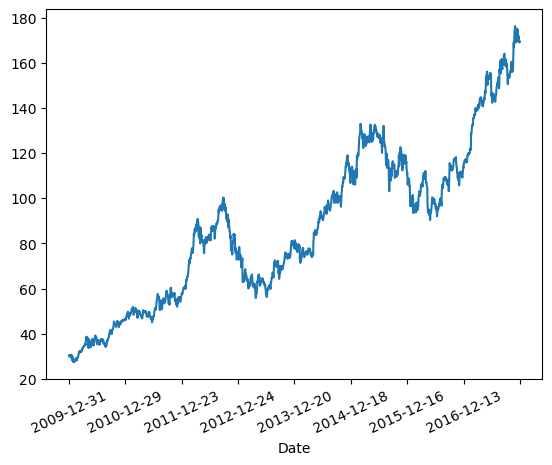

In [65]:
df.Close.plot(x="Date")
plt.xticks(rotation=25)
plt.show()

#### 20 日的移動平均

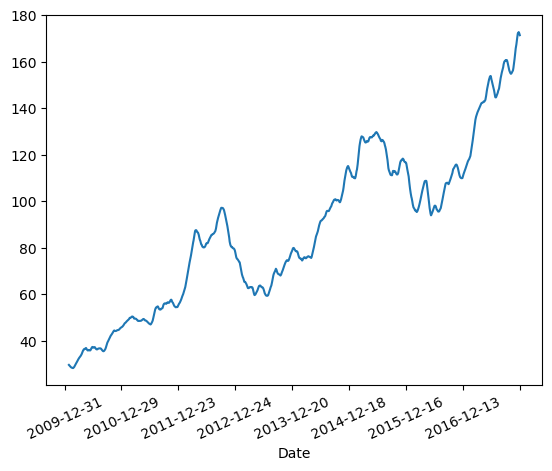

In [69]:
df.Close.rolling(20).mean().plot(label="$MA_{20}$")
plt.xticks(rotation=25)
plt.show()

#### 20 日和 60 日的移動平均

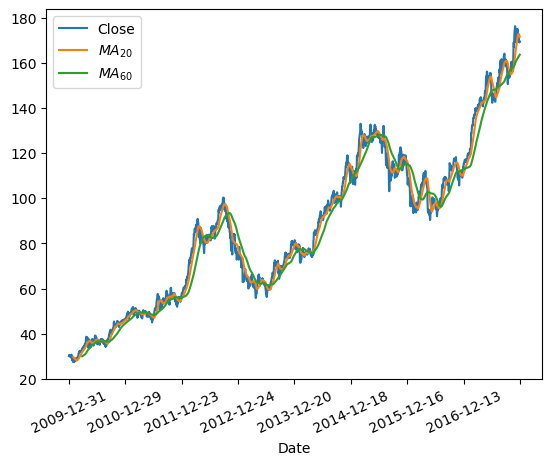

In [72]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)
plt.xticks(rotation=25)
plt.show()

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


300

299

299

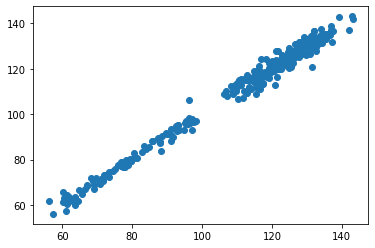

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [74]:
mydata = np.random.randn(4,3)
mydata

array([[-0.91492388, -0.91984379,  0.86650613],
       [ 1.96858242, -0.93655138, -0.33948668],
       [ 1.95060095,  1.14758868, -1.83143966],
       [-1.87468443, -1.69530135, -0.23005246]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [76]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))
df2

,A,B,C
0,-0.914924,-0.919844,0.866506
1,1.968582,-0.936551,-0.339487
2,1.950601,1.147589,-1.831440
3,-1.874684,-1.695301,-0.230052


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [77]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))
df3

,A,B,C
0,0.474718,-0.648720,0.841700
1,-0.149461,0.938369,-0.018703
2,-0.224800,0.641965,0.707637


In [79]:
df4 = pd.concat([df2, df3])
df4

,A,B,C
0,-0.914924,-0.919844,0.866506
1,1.968582,-0.936551,-0.339487
2,1.950601,1.147589,-1.831440
3,-1.874684,-1.695301,-0.230052
0,0.474718,-0.648720,0.841700
1,-0.149461,0.938369,-0.018703
2,-0.224800,0.641965,0.707637


前面我們弄得亂七八糟的 index 重設一下。

In [85]:
df4.reset_index(inplace=True, drop=True)
print(df4)

   index         A         B         C
0      0 -0.914924 -0.919844  0.866506
1      1  1.968582 -0.936551 -0.339487
2      2  1.950601  1.147589 -1.831440
3      3 -1.874684 -1.695301 -0.230052
4      0  0.474718 -0.648720  0.841700
5      1 -0.149461  0.938369 -0.018703
6      2 -0.224800  0.641965  0.707637


,A,B,C
0,-2.552313,1.906824,-0.201567
1,1.017096,-0.032225,-0.379340
2,-0.251371,1.026546,2.267663
3,-0.068840,-0.611686,0.174140
4,-0.171660,1.542380,2.685066
5,0.786684,-1.182996,0.401870
6,-2.216455,0.299553,-1.112735


#### 横向的貼

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [87]:
df5 = pd.concat([df2, df3], axis=1)
df5

,A,B,C,A,B,C
0,-0.914924,-0.919844,0.866506,0.474718,-0.648720,0.841700
1,1.968582,-0.936551,-0.339487,-0.149461,0.938369,-0.018703
2,1.950601,1.147589,-1.831440,-0.224800,0.641965,0.707637
3,-1.874684,-1.695301,-0.230052,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [88]:
name_df = pd.DataFrame({"姓名":["張雅婷", "劉秀娟", "劉俊宏", "葉育旭", "彭怡君",
                              "郭惠婷", "王仕孝", "陳玉堯", "顏辰辛", "周宏偉"]})
name_df

,姓名
0,張雅婷
1,劉秀娟
2,劉俊宏
3,葉育旭
4,彭怡君
5,郭惠婷
6,王仕孝
7,陳玉堯
8,顏辰辛
9,周宏偉


In [95]:
df_grades = pd.DataFrame(np.random.randint(6,16,(10,5)),
                        columns=['國文','英文','數學','社會','自然'])
df_grades

,國文,英文,數學,社會,自然
0,11,8,7,15,11
1,10,15,6,13,6
2,8,15,15,9,13
3,11,7,6,7,15
4,10,7,12,15,9
5,7,15,11,14,9
6,9,15,14,12,8
7,11,7,15,10,6
8,10,13,8,12,11
9,8,8,12,15,8


In [96]:
df_grades.reset_index(inplace=True, drop=False)
df_grades

,index,國文,英文,數學,社會,自然
0,0,11,8,7,15,11
1,1,10,15,6,13,6
2,2,8,15,15,9,13
3,3,11,7,6,7,15
4,4,10,7,12,15,9
5,5,7,15,11,14,9
6,6,9,15,14,12,8
7,7,11,7,15,10,6
8,8,10,13,8,12,11
9,9,8,8,12,15,8


In [97]:
name_grades_df = pd.concat([name_df, df_grades], axis=1)
name_grades_df

,姓名,index,國文,英文,數學,社會,自然
0,張雅婷,0,11,8,7,15,11
1,劉秀娟,1,10,15,6,13,6
2,劉俊宏,2,8,15,15,9,13
3,葉育旭,3,11,7,6,7,15
4,彭怡君,4,10,7,12,15,9
5,郭惠婷,5,7,15,11,14,9
6,王仕孝,6,9,15,14,12,8
7,陳玉堯,7,11,7,15,10,6
8,顏辰辛,8,10,13,8,12,11
9,周宏偉,9,8,8,12,15,8
